In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
csv_reg=pd.read_csv('Vader Sentiment Analysis.csv')

In [3]:
csv_reg.sample(10)

,Unnamed: 0,username,neg,neu,pos,compound,Unnamed: 0.1,date,user,tweet_text,Location,coordinates,Unnamed: 7,Sentiment,Score
39606,39606,AnimalProjectGE,0.253,0.648,0.099,-0.5423,13717,2022-03-28 19:24:13+00:00,https://twitter.com/AnimalProjectGE,What a day for #straydogs in #Zugdidi 🇬🇪 aband...,"Tbilisi, Georgia",NaN,NaN,negative,0.290977
49394,49394,omventure,0.000,0.732,0.268,0.8555,11432,2022-04-17 04:52:08+00:00,https://twitter.com/omventure,"""Pain, suffering, grief…can be experienced by ...",A Planet Needing Our Help,NaN,NaN,negative,0.272314
4370,4370,joe8Zeta7,0.000,0.709,0.291,0.7901,20059,2022-02-03 20:10:24+00:00,https://twitter.com/joe8Zeta7,Speak Out Against Plans for an Intensive Chick...,Italia,NaN,NaN,neutral,0.589853
27233,27233,SilentBawse,0.357,0.607,0.036,-0.9725,818,2022-07-25 05:42:59+00:00,https://twitter.com/SilentBawse,According to #AnimalRights scheme there isn't ...,Punjab/Pakistan,NaN,NaN,negative,0.365839
17641,17641,EnviroEdgeNews,0.257,0.595,0.148,-0.5574,54694,2021-03-23 18:28:24+00:00,https://twitter.com/EnviroEdgeNews,DEMAND DEFORESTATION-FREE OLYMPICS! Tokyo Olym...,NaN,NaN,NaN,neutral,0.507675
8246,8246,Animal_Posting,0.060,0.826,0.114,0.3400,71180,2020-11-16 16:32:12+00:00,https://twitter.com/Animal_Posting,I think #vegetarians who live according to alt...,NaN,NaN,NaN,positive,0.894057
80200,80200,criticalviews20,0.126,0.667,0.207,0.2960,60800,2021-02-06 03:19:40+00:00,https://twitter.com/criticalviews20,"Truly disgusted by @VVD , \n\n#AnimalXXX = 🤢🐖🤢...","Davos, Switzerland",NaN,NaN,positive,0.725126
16191,16191,aktweet20,0.180,0.711,0.109,-0.3612,7234,2022-05-24 13:46:53+00:00,https://twitter.com/aktweet20,"The time for Congress to act on horse soring, ...",NaN,NaN,NaN,positive,0.623726
55197,55197,veganrick,0.000,0.931,0.069,0.4404,41254,2021-07-16 03:59:18+00:00,https://twitter.com/veganrick,Endangered Elk Starve While the National Park ...,Canada🇨🇦,NaN,NaN,positive,0.656538
78347,78347,barr3aby,0.161,0.654,0.185,-0.0000,56362,2021-03-09 16:50:35+00:00,https://twitter.com/barr3aby,Hold @Sofina_Foods and Brussels Transport acco...,NaN,NaN,NaN,negative,0.309462


In [4]:
features=['neg','neu','pos','compound']
features_azure=['Score']
target_label='Sentiment'
target_label1='Sentiment'

In [5]:
senti_x,senti_y=csv_reg[features].values,csv_reg[target_label].values

x_train,x_test,y_train,y_test=train_test_split(senti_x, senti_y, train_size=0.7,random_state=0,stratify=senti_y)
print('Training Set : %d, Test Set : %d \n'%(x_train.shape[0],x_test.shape[0]))

Training Set : 62999, Test Set : 27001 



In [6]:
#create the gaussian classifier for vader sentiment analysis
clf=RandomForestClassifier(n_estimators=50)

#Train the model
clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [7]:
#add the test data
Y_pred=clf.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score

print('Accuracy Score of the vader predictive model is:',accuracy_score(Y_pred,y_test))

Accuracy Score of the vader predictive model is: 0.4736861597718603


In [9]:
azure_x=csv_reg[features_azure].values
azure_y=csv_reg[target_label1].values
x_train_azure,x_test_azure,y_train_azure,y_test_azure=train_test_split(azure_x,azure_y,train_size=0.7,random_state=0,stratify=senti_y)
print('Training Set : %d, Test Set : %d \n'%(x_train_azure.shape[0],x_test_azure.shape[0]))

Training Set : 62999, Test Set : 27001 



In [10]:
#create the gaussian classifier for vader sentiment analysis
clfazure=RandomForestClassifier(n_estimators=300)

#Train the Model
clfazure.fit(x_train_azure,y_train_azure)

RandomForestClassifier(n_estimators=300)

In [11]:
Y_Pred_azure=clfazure.predict(x_test_azure)

In [12]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import classification_report
print('Accuracy Score of the Azure predictive model is:',accuracy_score(y_test_azure,Y_Pred_azure))
print('\n Overall precision score of the model is:',precision_score(y_test_azure,Y_Pred_azure,average='macro'))
print('\n Overall recall score of the model is:',recall_score(y_test_azure,Y_Pred_azure,average='macro'))

print('\n', classification_report(y_test_azure,Y_Pred_azure))

Accuracy Score of the Azure predictive model is: 1.0

 Overall precision score of the model is: 1.0

 Overall recall score of the model is: 1.0

               precision    recall  f1-score   support

    negative       1.00      1.00      1.00     10440
     neutral       1.00      1.00      1.00      6510
    positive       1.00      1.00      1.00     10051

    accuracy                           1.00     27001
   macro avg       1.00      1.00      1.00     27001
weighted avg       1.00      1.00      1.00     27001



In [13]:
from sklearn.metrics import confusion_matrix
print('Accuracy Score of the vader predictive model is:',accuracy_score(Y_pred,y_test))
print('\n Overall precision score of the model is:',precision_score(Y_pred,y_test,average='macro'))
print('\n Overall recall score of the model is:',recall_score(Y_pred,y_test,average='macro'))

print('\n', classification_report(Y_pred,y_test))

mcm_vader=confusion_matrix(Y_pred,y_test)

print('\n',mcm_vader)

vader_classes=['positive','negative','neutral']


Accuracy Score of the vader predictive model is: 0.4736861597718603

 Overall precision score of the model is: 0.44271851470876705

 Overall recall score of the model is: 0.4543617119106747

               precision    recall  f1-score   support

    negative       0.54      0.50      0.52     11196
     neutral       0.22      0.39      0.28      3653
    positive       0.57      0.47      0.52     12152

    accuracy                           0.47     27001
   macro avg       0.44      0.45      0.44     27001
weighted avg       0.51      0.47      0.49     27001


 [[5646 2351 3199]
 [1115 1415 1123]
 [3679 2744 5729]]


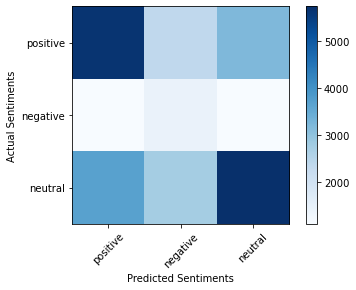

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mcm_vader, interpolation="nearest",cmap=plt.cm.Blues)
plt.colorbar()
tick_marks=np.arange(len(vader_classes))
plt.xticks(tick_marks,vader_classes,rotation=45)
plt.yticks(tick_marks,vader_classes)
plt.xlabel("Predicted Sentiments")
plt.ylabel("Actual Sentiments")
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
logisvader=LogisticRegression()

logisvader.fit(x_train,y_train)

Y_pred_vad_log=logisvader.predict(x_test)

In [16]:
print('Accuracy Score of the vader Logistic predictive model is:',accuracy_score(Y_pred_vad_log,y_test))
print('\n Overall precision score of the model is:',precision_score(Y_pred_vad_log,y_test,average='macro'))
print('\n Overall recall score of the model is:',recall_score(Y_pred_vad_log,y_test,average='macro'))

print('\n', classification_report(Y_pred_vad_log,y_test))

mcm_vader=confusion_matrix(Y_pred_vad_log,y_test)


Accuracy Score of the vader Logistic predictive model is: 0.4306136809747787

 Overall precision score of the model is: 0.3790631699151696


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



 Overall recall score of the model is: 0.28808525150769154


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

    negative       0.51      0.44      0.47     11892
     neutral       0.00      0.00      0.00         0
    positive       0.63      0.42      0.50     15109

    accuracy                           0.43     27001
   macro avg       0.38      0.29      0.33     27001
weighted avg       0.58      0.43      0.49     27001



In [17]:
logisazure=LogisticRegression()
logisazure.fit(x_train_azure,y_train_azure)

LogisticRegression()

In [18]:
y_pred_azure_log=logisazure.predict(x_test_azure)

In [19]:
print('Accuracy Score of the Azure Logistic predictive model is:',accuracy_score(y_pred_azure_log,y_test_azure))
print('\n Overall precision score of the model is:',precision_score(y_pred_azure_log,y_test_azure,average='macro'))
print('\n Overall recall score of the model is:',recall_score(y_pred_azure_log,y_test_azure,average='macro'))

print('\n', classification_report(Y_pred_vad_log,y_test_azure))

mcm_vader=confusion_matrix(Y_pred_vad_log,y_test_azure)

Accuracy Score of the Azure Logistic predictive model is: 0.9957038628198955

 Overall precision score of the model is: 0.9962419248041883

 Overall recall score of the model is: 0.9941644028574302


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



               precision    recall  f1-score   support

    negative       0.51      0.44      0.47     11892
     neutral       0.00      0.00      0.00         0
    positive       0.63      0.42      0.50     15109

    accuracy                           0.43     27001
   macro avg       0.38      0.29      0.33     27001
weighted avg       0.58      0.43      0.49     27001

